In [1]:
import numpy as np
import torch
from torchvision import datasets, transforms
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

Device: cuda


In [3]:
# 1) Load raw MNIST (uint8 tensor of shape [60000,28,28])
raw = datasets.MNIST('data', download = True)
imgs = raw.data.float() / 255.0   # now a float tensor in [0,1]

# 2) Compute statistics with built‑in tensor methods
mean = imgs.mean().item()
std  = imgs.std(unbiased=False).item()  # population std

# 3) Define your transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((mean,), (std,))
])

mnist_data = datasets.MNIST(root='./data', transform=transform)
data_loader = torch.utils.data.DataLoader(mnist_data, batch_size=len(mnist_data))
images_tensor, _ = next(iter(data_loader))
images = images_tensor.squeeze().numpy()

100%|██████████| 9.91M/9.91M [00:00<00:00, 42.0MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.21MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.64MB/s]


In [ ]:
def extract_patches(images, patch_size=5):
    patches = []
    for img in images:
        for i in range(0, img.shape[0] - patch_size + 1):
            for j in range(0, img.shape[1] - patch_size + 1):
                patch = img[i:i+patch_size, j:j+patch_size]
                if np.std(patch)>0:
                    patches.append(patch.flatten())
    patches = np.array(patches)
    return patches

patches = extract_patches(images, patch_size=5)

In [5]:
k = 100
kmeans = KMeans(n_clusters=k)
kmeans.fit(patches)

KMeans(n_clusters=100)

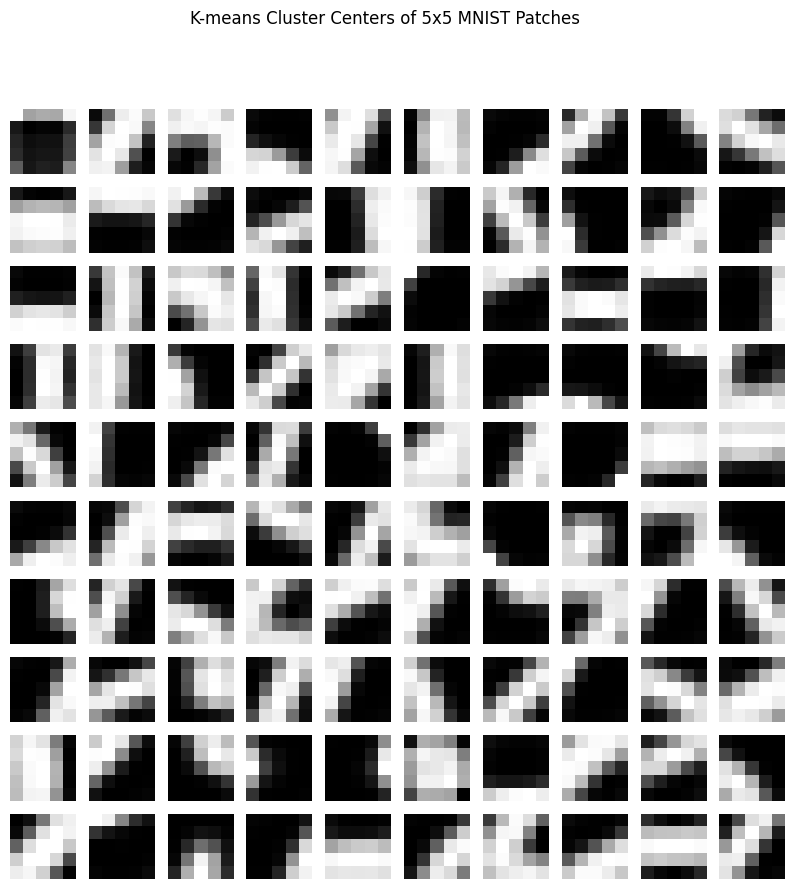

In [6]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(kmeans.cluster_centers_[i].reshape(5, 5), cmap='gray')
    ax.axis('off')
plt.suptitle("K-means Cluster Centers of 5x5 MNIST Patches")
plt.show()